In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load the dataset to explore its structure
file_path = 'C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/Reference Data/Merged flows DB ALL HEADERS.csv'
try:
    df = pd.read_csv(file_path)
    # Display the first few rows and some basic statistics about the dataset
    df_head = df.head()
    df_info = df.info()
    df_describe = df.describe()
except Exception as e:
    df_head, df_info, df_describe = None, str(e), None

df_head, df_info, df_describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14608 entries, 0 to 14607
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     14608 non-null  int64  
 1   Date                           14608 non-null  object 
 2   Period End                     14608 non-null  object 
 3   year                           14608 non-null  int64  
 4   month                          14608 non-null  int64  
 5   YMD                            14608 non-null  object 
 6   To Musina,Total_3201           14374 non-null  float64
 7   To Musina,Light_3201           14374 non-null  float64
 8   To Musina,Short HV_3201        14374 non-null  float64
 9   To Musina,Medium HV_3201       14374 non-null  float64
 10  To Musina,Long HV_3201         14374 non-null  float64
 11  To Beit Bridge,Total_3201      14374 non-null  float64
 12  To Beit Bridge,Light_3201      14374 non-null 

(   Unnamed: 0        Date Period End  year  month         YMD  \
 0           0  2018-01-01   03:00:00  2018      1  2018-01-01   
 1           1  2018-01-01   06:00:00  2018      1  2018-01-01   
 2           2  2018-01-01   09:00:00  2018      1  2018-01-01   
 3           3  2018-01-01   12:00:00  2018      1  2018-01-01   
 4           4  2018-01-01   15:00:00  2018      1  2018-01-01   
 
    To Musina,Total_3201  To Musina,Light_3201  To Musina,Short HV_3201  \
 0                 129.0                  98.0                      6.0   
 1                 181.0                 150.0                      0.0   
 2                 200.0                 184.0                      3.0   
 3                 221.0                 187.0                      6.0   
 4                 250.0                 221.0                      5.0   
 
    To Musina,Medium HV_3201  ...  To Musina,Short HV_3202  \
 0                      13.0  ...                     52.0   
 1                      16

In [3]:
# Convert the 'Date' column to a DateTime object
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataset by the 'Date' column
df_sorted = df.sort_values(by='Date')

# Display the first few rows after sorting
df_sorted_head = df_sorted.head()
df_sorted_head

,Unnamed: 0,Date,Period End,year,month,YMD,"To Musina,Total_3201","To Musina,Light_3201","To Musina,Short HV_3201","To Musina,Medium HV_3201",...,"To Musina,Short HV_3202","To Musina,Medium HV_3202","To Musina,Long HV_3202","Road,Total_3202","Road,Light_3202","Road,Short HV_3202","Road,Medium HV_3202","Road,Long HV_3202",_merge,dt
0,0,2018-01-01,03:00:00,2018,1,2018-01-01,129.0,98.0,6.0,13.0,...,52.0,15.0,21.0,485.0,354.0,63.0,33.0,35.0,both,2018-01-01
1,1,2018-01-01,06:00:00,2018,1,2018-01-01,181.0,150.0,0.0,16.0,...,20.0,11.0,41.0,476.0,356.0,30.0,28.0,62.0,both,2018-01-01
2,2,2018-01-01,09:00:00,2018,1,2018-01-01,200.0,184.0,3.0,2.0,...,17.0,10.0,16.0,456.0,389.0,30.0,12.0,25.0,both,2018-01-01
3,3,2018-01-01,12:00:00,2018,1,2018-01-01,221.0,187.0,6.0,9.0,...,25.0,5.0,21.0,491.0,387.0,49.0,9.0,46.0,both,2018-01-01
4,4,2018-01-01,15:00:00,2018,1,2018-01-01,250.0,221.0,5.0,14.0,...,18.0,3.0,15.0,607.0,531.0,35.0,4.0,37.0,both,2018-01-01


In [4]:
# Identifying columns with decimal values and converting them to integers
for col in df_sorted.columns:
    if df_sorted[col].dtype == 'float64':
        df_sorted[col] = df_sorted[col].fillna(0).astype(int)

# Display the first few rows after removing decimals
df_sorted_head_no_decimals = df_sorted.head()
df_sorted_head_no_decimals


,Unnamed: 0,Date,Period End,year,month,YMD,"To Musina,Total_3201","To Musina,Light_3201","To Musina,Short HV_3201","To Musina,Medium HV_3201",...,"To Musina,Short HV_3202","To Musina,Medium HV_3202","To Musina,Long HV_3202","Road,Total_3202","Road,Light_3202","Road,Short HV_3202","Road,Medium HV_3202","Road,Long HV_3202",_merge,dt
0,0,2018-01-01,03:00:00,2018,1,2018-01-01,129,98,6,13,...,52,15,21,485,354,63,33,35,both,2018-01-01
1,1,2018-01-01,06:00:00,2018,1,2018-01-01,181,150,0,16,...,20,11,41,476,356,30,28,62,both,2018-01-01
2,2,2018-01-01,09:00:00,2018,1,2018-01-01,200,184,3,2,...,17,10,16,456,389,30,12,25,both,2018-01-01
3,3,2018-01-01,12:00:00,2018,1,2018-01-01,221,187,6,9,...,25,5,21,491,387,49,9,46,both,2018-01-01
4,4,2018-01-01,15:00:00,2018,1,2018-01-01,250,221,5,14,...,18,3,15,607,531,35,4,37,both,2018-01-01


In [5]:
# Identify columns with missing values and the number of missing values in each column
missing_data_summary = df.isnull().sum()
missing_columns = missing_data_summary[missing_data_summary > 0]

# Calculate the percentage of missing values for each column
missing_percentage = (missing_columns / df.shape[0]) * 100

missing_columns, missing_percentage

(To Musina,Total_3201             234
 To Musina,Light_3201             234
 To Musina,Short HV_3201          234
 To Musina,Medium HV_3201         234
 To Musina,Long HV_3201           234
 To Beit Bridge,Total_3201        234
 To Beit Bridge,Light_3201        234
 To Beit Bridge,Short HV_3201     234
 To Beit Bridge,Medium HV_3201    234
 To Beit Bridge,Long HV_3201      234
 Road,Total_3201                  234
 Road,Light_3201                  234
 Road,Short HV_3201               234
 Road,Medium HV_3201              234
 Road,Long HV_3201                234
 To Beit Bridge,Total_3202        124
 To Beit Bridge,Light_3202        124
 To Beit Bridge,Short HV_3202     124
 To Beit Bridge,Medium HV_3202    124
 To Beit Bridge,Long HV_3202      124
 To Musina,Total_3202             124
 To Musina,Light_3202             124
 To Musina,Short HV_3202          124
 To Musina,Medium HV_3202         124
 To Musina,Long HV_3202           124
 Road,Total_3202                  124
 Road,Light_

In [6]:
# Apply forward-fill to impute the missing values in the sorted dataset
df_filled = df_sorted.fillna(method='ffill')

# Check if any missing values remain
missing_values_after_fill = df_filled.isnull().sum().sum()

missing_values_after_fill

C:\Users\shume\AppData\Local\Temp\ipykernel_6732\3416050338.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_sorted.fillna(method='ffill')


0

In [7]:
# Resample the dataset into daily aggregates by summing counts for each date
df_daily = df_filled.groupby('Date').sum()



df_daily = df_daily.drop(columns=['Unnamed: 0', 'Period End','year','month','YMD','_merge','dt'])

# Display the first few rows of the daily aggregated dataset
df_daily_head = df_daily.head()
df_daily_head


,"To Musina,Total_3201","To Musina,Light_3201","To Musina,Short HV_3201","To Musina,Medium HV_3201","To Musina,Long HV_3201","To Beit Bridge,Total_3201","To Beit Bridge,Light_3201","To Beit Bridge,Short HV_3201","To Beit Bridge,Medium HV_3201","To Beit Bridge,Long HV_3201",...,"To Musina,Total_3202","To Musina,Light_3202","To Musina,Short HV_3202","To Musina,Medium HV_3202","To Musina,Long HV_3202","Road,Total_3202","Road,Light_3202","Road,Short HV_3202","Road,Medium HV_3202","Road,Long HV_3202"
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1566,1323,36,88,119,2521,2184,91,71,175,...,2503,2023,201,76,203,4082,3266,316,143,357
2018-01-02,2936,2598,76,123,139,3919,3480,101,100,238,...,3863,3110,327,143,283,6848,5581,560,234,473
2018-01-03,3825,3428,104,99,194,5135,4503,162,133,337,...,5005,4030,373,208,394,8895,7302,657,305,631
2018-01-04,4050,3556,110,143,241,5459,4805,172,153,329,...,5353,4292,422,236,403,9471,7692,719,345,715
2018-01-05,4247,3697,153,147,250,5291,4687,172,128,304,...,5151,4164,419,212,356,9443,7683,735,327,698


In [8]:
# Save the df_daily DataFrame to a CSV file
df_daily.to_csv('C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/Reference Data/Merged_flows_DB_Daily_Aggregated.csv')


In [9]:
df = pd.read_csv('C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/Reference Data/Merged_flows_DB_Daily_Aggregated.csv')

In [10]:
# Display the first few rows of the DataFrame to give an overview of the data
df.head()

,Date,"To Musina,Total_3201","To Musina,Light_3201","To Musina,Short HV_3201","To Musina,Medium HV_3201","To Musina,Long HV_3201","To Beit Bridge,Total_3201","To Beit Bridge,Light_3201","To Beit Bridge,Short HV_3201","To Beit Bridge,Medium HV_3201",...,"To Musina,Total_3202","To Musina,Light_3202","To Musina,Short HV_3202","To Musina,Medium HV_3202","To Musina,Long HV_3202","Road,Total_3202","Road,Light_3202","Road,Short HV_3202","Road,Medium HV_3202","Road,Long HV_3202"
0,2018-01-01,1566,1323,36,88,119,2521,2184,91,71,...,2503,2023,201,76,203,4082,3266,316,143,357
1,2018-01-02,2936,2598,76,123,139,3919,3480,101,100,...,3863,3110,327,143,283,6848,5581,560,234,473
2,2018-01-03,3825,3428,104,99,194,5135,4503,162,133,...,5005,4030,373,208,394,8895,7302,657,305,631
3,2018-01-04,4050,3556,110,143,241,5459,4805,172,153,...,5353,4292,422,236,403,9471,7692,719,345,715
4,2018-01-05,4247,3697,153,147,250,5291,4687,172,128,...,5151,4164,419,212,356,9443,7683,735,327,698


In [11]:
# Load the uploaded holiday CSV file into a DataFrame
holiday_file_path = 'C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/Reference Data/Combined_Holidays.csv'
df_holidays = pd.read_csv(holiday_file_path)

# Display the first few rows of the holiday DataFrame to give an overview of the data
df_holidays.head()


,Date,Holiday
0,2018-01-01,New Year's Day
1,2018-02-21,Robert Gabriel Mugabe National Youth Day
2,2018-03-21,Human Rights Day
3,2018-03-30,Good Friday
4,2018-03-31,Easter Saturday


In [12]:
# Merge the holiday dataset with the existing traffic dataset based on the 'Date' column
# Convert the 'Date' columns in both datasets to datetime format for accurate merging
df['Date'] = pd.to_datetime(df['Date'])
df_holidays['Date'] = pd.to_datetime(df_holidays['Date'])

# Perform the merge
df_merged = pd.merge(df, df_holidays, on='Date', how='left')

# Display the first few rows of the merged DataFrame to give an overview of the data
df_merged.head(20)


,Date,"To Musina,Total_3201","To Musina,Light_3201","To Musina,Short HV_3201","To Musina,Medium HV_3201","To Musina,Long HV_3201","To Beit Bridge,Total_3201","To Beit Bridge,Light_3201","To Beit Bridge,Short HV_3201","To Beit Bridge,Medium HV_3201",...,"To Musina,Light_3202","To Musina,Short HV_3202","To Musina,Medium HV_3202","To Musina,Long HV_3202","Road,Total_3202","Road,Light_3202","Road,Short HV_3202","Road,Medium HV_3202","Road,Long HV_3202",Holiday
0,2018-01-01,1566,1323,36,88,119,2521,2184,91,71,...,2023,201,76,203,4082,3266,316,143,357,New Year's Day
1,2018-01-02,2936,2598,76,123,139,3919,3480,101,100,...,3110,327,143,283,6848,5581,560,234,473,NaN
2,2018-01-03,3825,3428,104,99,194,5135,4503,162,133,...,4030,373,208,394,8895,7302,657,305,631,NaN
3,2018-01-04,4050,3556,110,143,241,5459,4805,172,153,...,4292,422,236,403,9471,7692,719,345,715,NaN
4,2018-01-05,4247,3697,153,147,250,5291,4687,172,128,...,4164,419,212,356,9443,7683,735,327,698,NaN
5,2018-01-06,4332,3758,129,162,283,5536,4937,162,137,...,4396,431,225,358,9787,7945,729,391,722,NaN
6,2018-01-07,3088,2589,106,146,247,4469,3870,146,123,...,3509,369,161,373,7511,5942,550,307,712,NaN
7,2018-01-08,3593,3160,129,104,200,4501,3893,139,146,...,3523,346,196,382,8096,6542,603,324,627,NaN
8,2018-01-09,3310,2790,115,126,279,4076,3424,132,141,...,3085,324,152,462,7387,5700,612,276,799,NaN
9,2018-01-10,3276,2724,140,146,266,4003,3394,138,140,...,3046,333,182,375,7260,5640,607,307,706,NaN


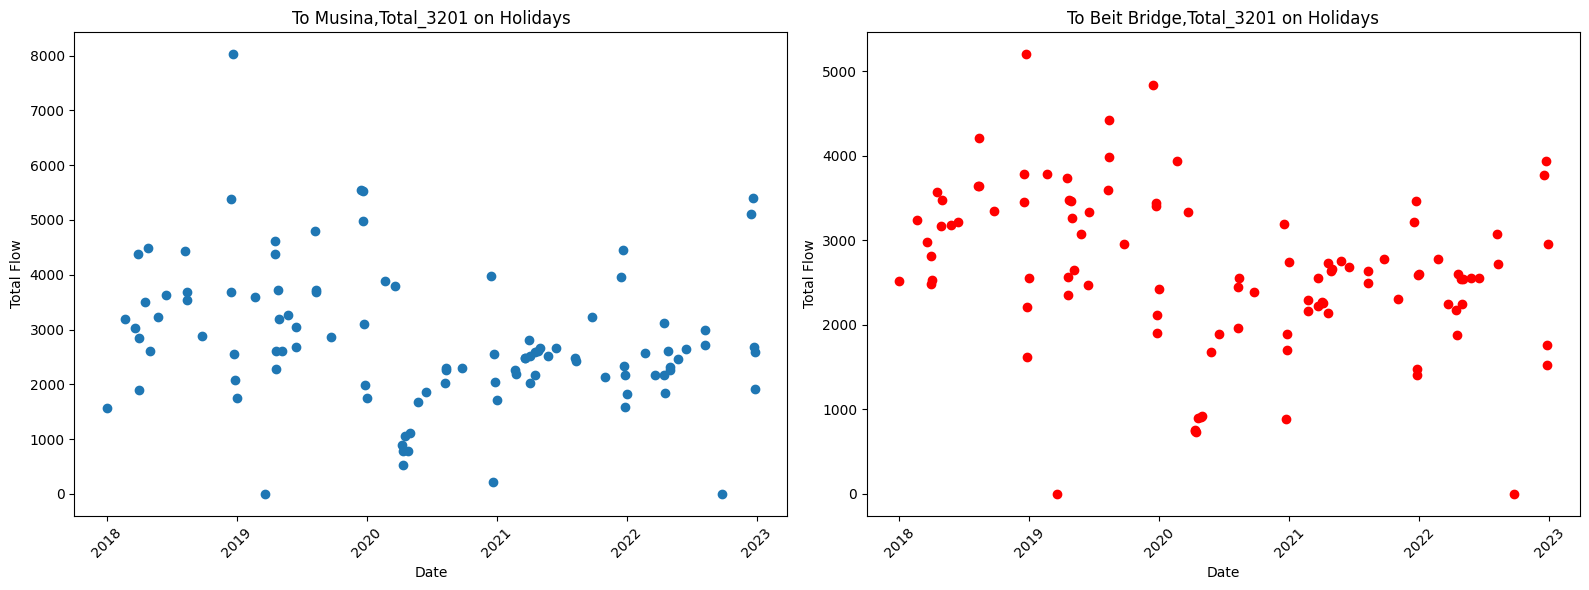

In [13]:
# Filter the merged dataset to only include rows where a holiday is present
df_holiday_traffic = df_merged[df_merged['Holiday'].notna()]

# Plotting traffic data for the columns "To Musina,Total_3201" and "To Beit Bridge,Total_3201" around holidays
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_holiday_traffic['Date'], df_holiday_traffic['To Musina,Total_3201'], label='To Musina,Total_3201')
plt.title('To Musina,Total_3201 on Holidays')
plt.xlabel('Date')
plt.ylabel('Total Flow')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.scatter(df_holiday_traffic['Date'], df_holiday_traffic['To Beit Bridge,Total_3201'], label='To Beit Bridge,Total_3201', color='r')
plt.title('To Beit Bridge,Total_3201 on Holidays')
plt.xlabel('Date')
plt.ylabel('Total Flow')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [14]:
# Extract the day of the week from the 'Date' column in the merged dataset
# Monday=0, Sunday=6
df_merged['Day_of_Week'] = df_merged['Date'].dt.dayofweek

# Create a new column to categorize days as 'Weekday' or 'Weekend'
df_merged['Weekday_or_Weekend'] = df_merged['Day_of_Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Display the first few rows of the updated DataFrame to give an overview of the data
df_merged.head(10)


,Date,"To Musina,Total_3201","To Musina,Light_3201","To Musina,Short HV_3201","To Musina,Medium HV_3201","To Musina,Long HV_3201","To Beit Bridge,Total_3201","To Beit Bridge,Light_3201","To Beit Bridge,Short HV_3201","To Beit Bridge,Medium HV_3201",...,"To Musina,Medium HV_3202","To Musina,Long HV_3202","Road,Total_3202","Road,Light_3202","Road,Short HV_3202","Road,Medium HV_3202","Road,Long HV_3202",Holiday,Day_of_Week,Weekday_or_Weekend
0,2018-01-01,1566,1323,36,88,119,2521,2184,91,71,...,76,203,4082,3266,316,143,357,New Year's Day,0,Weekday
1,2018-01-02,2936,2598,76,123,139,3919,3480,101,100,...,143,283,6848,5581,560,234,473,NaN,1,Weekday
2,2018-01-03,3825,3428,104,99,194,5135,4503,162,133,...,208,394,8895,7302,657,305,631,NaN,2,Weekday
3,2018-01-04,4050,3556,110,143,241,5459,4805,172,153,...,236,403,9471,7692,719,345,715,NaN,3,Weekday
4,2018-01-05,4247,3697,153,147,250,5291,4687,172,128,...,212,356,9443,7683,735,327,698,NaN,4,Weekday
5,2018-01-06,4332,3758,129,162,283,5536,4937,162,137,...,225,358,9787,7945,729,391,722,NaN,5,Weekend
6,2018-01-07,3088,2589,106,146,247,4469,3870,146,123,...,161,373,7511,5942,550,307,712,NaN,6,Weekend
7,2018-01-08,3593,3160,129,104,200,4501,3893,139,146,...,196,382,8096,6542,603,324,627,NaN,0,Weekday
8,2018-01-09,3310,2790,115,126,279,4076,3424,132,141,...,152,462,7387,5700,612,276,799,NaN,1,Weekday
9,2018-01-10,3276,2724,140,146,266,4003,3394,138,140,...,182,375,7260,5640,607,307,706,NaN,2,Weekday


In [15]:
# Save the df_daily DataFrame to a CSV file
df_merged.to_csv('C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/Reference Data/Merged_flows_DB_Daily_Aggregated_Holidays_weekdays.csv')


In [16]:
# Importing necessary libraries for data analysis
import pandas as pd

# Load the dataset
dataset_path = 'C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/Reference Data/Merged_flows_DB_Daily_Aggregated_Holidays_weekdays.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows and general information of the dataset to understand its structure
df_head = df.head()
df_info = df.info()

df_head, df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     1826 non-null   int64 
 1   Date                           1826 non-null   object
 2   To Musina,Total_3201           1826 non-null   int64 
 3   To Musina,Light_3201           1826 non-null   int64 
 4   To Musina,Short HV_3201        1826 non-null   int64 
 5   To Musina,Medium HV_3201       1826 non-null   int64 
 6   To Musina,Long HV_3201         1826 non-null   int64 
 7   To Beit Bridge,Total_3201      1826 non-null   int64 
 8   To Beit Bridge,Light_3201      1826 non-null   int64 
 9   To Beit Bridge,Short HV_3201   1826 non-null   int64 
 10  To Beit Bridge,Medium HV_3201  1826 non-null   int64 
 11  To Beit Bridge,Long HV_3201    1826 non-null   int64 
 12  Road,Total_3201                1826 non-null   int64 
 13  Roa

(   Unnamed: 0        Date  To Musina,Total_3201  To Musina,Light_3201  \
 0           0  2018-01-01                  1566                  1323   
 1           1  2018-01-02                  2936                  2598   
 2           2  2018-01-03                  3825                  3428   
 3           3  2018-01-04                  4050                  3556   
 4           4  2018-01-05                  4247                  3697   
 
    To Musina,Short HV_3201  To Musina,Medium HV_3201  To Musina,Long HV_3201  \
 0                       36                        88                     119   
 1                       76                       123                     139   
 2                      104                        99                     194   
 3                      110                       143                     241   
 4                      153                       147                     250   
 
    To Beit Bridge,Total_3201  To Beit Bridge,Light_3201  \
 0    

In [17]:
# Convert the 'Holiday' column to binary format: 1 for values present and 0 for null values
df['Holiday'] = df['Holiday'].notna().astype(int)

# Show the first few rows to confirm that the transformation was successful
df_head_updated = df[['Holiday']].head()

df_head_updated


,Holiday
0,1
1,0
2,0
3,0
4,0


In [18]:
# Load the new dataset related to OPEC basket day price
opec_df = pd.read_csv('C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/OPEC_Fuel_price/basketDayArchives.csv')

# Convert the 'Date' columns in both datasets to datetime format for merging
df['Date'] = pd.to_datetime(df['Date'])
opec_df['Date'] = pd.to_datetime(opec_df['Date'])

# Merge the datasets on the 'Date' column
merged_df = pd.merge(df, opec_df, on='Date', how='left')

# Show the first few rows of the merged dataset to confirm successful integration
merged_df_head = merged_df.head()

merged_df_head


,Unnamed: 0,Date,"To Musina,Total_3201","To Musina,Light_3201","To Musina,Short HV_3201","To Musina,Medium HV_3201","To Musina,Long HV_3201","To Beit Bridge,Total_3201","To Beit Bridge,Light_3201","To Beit Bridge,Short HV_3201",...,"To Musina,Long HV_3202","Road,Total_3202","Road,Light_3202","Road,Short HV_3202","Road,Medium HV_3202","Road,Long HV_3202",Holiday,Day_of_Week,Weekday_or_Weekend,Price
0,0,2018-01-01,1566,1323,36,88,119,2521,2184,91,...,203,4082,3266,316,143,357,1,0,Weekday,NaN
1,1,2018-01-02,2936,2598,76,123,139,3919,3480,101,...,283,6848,5581,560,234,473,0,1,Weekday,64.84
2,2,2018-01-03,3825,3428,104,99,194,5135,4503,162,...,394,8895,7302,657,305,631,0,2,Weekday,65.13
3,3,2018-01-04,4050,3556,110,143,241,5459,4805,172,...,403,9471,7692,719,345,715,0,3,Weekday,66.13
4,4,2018-01-05,4247,3697,153,147,250,5291,4687,172,...,356,9443,7683,735,327,698,0,4,Weekday,65.86


In [19]:
# Perform linear interpolation to fill missing values in the 'Price' column
merged_df['Price'] = merged_df['Price'].interpolate()

# Set the first value in the 'Price' column to 64.84 as specified
merged_df['Price'].iloc[0] = 64.84

# Show the first few rows to confirm that the missing values have been filled and the specified value has been set
filled_values_head = merged_df[['Date', 'Price']].head()

filled_values_head


C:\Users\shume\AppData\Local\Temp\ipykernel_6732\3047730315.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Price'].iloc[0] = 64.84


,Date,Price
0,2018-01-01,64.84
1,2018-01-02,64.84
2,2018-01-03,65.13
3,2018-01-04,66.13
4,2018-01-05,65.86


In [20]:
# List of stock dataset filenames
stock_files = [
    'AMS.JO_stock_data.csv',
    'BAW.JO_stock_data.csv',
    'FSR.JO_stock_data.csv',
    'HAR.JO_stock_data.csv',
    'SBK.JO_stock_data.csv',
    'SHP.JO_stock_data.csv',
    'WHL.JO_stock_data.csv'
]

# Loop through each stock dataset
for stock_file in stock_files:
    # Load the stock dataset
    stock_df = pd.read_csv(f"C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/stock index/{stock_file}")
    
    # Convert 'Date' to datetime format
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])
    
    # Extract relevant columns and rename
    stock_df = stock_df[['Date', 'Adj Close']].rename(columns={'Adj Close': stock_file.split('_')[0]})
    
    # Merge with main dataset
    if merged_df.empty:
        merged_df = stock_df
    else:
        merged_df = pd.merge(merged_df, stock_df, on='Date', how='left')

# Show the first few rows
print(merged_df.head())


   Unnamed: 0       Date  To Musina,Total_3201  To Musina,Light_3201  \
0           0 2018-01-01                  1566                  1323   
1           1 2018-01-02                  2936                  2598   
2           2 2018-01-03                  3825                  3428   
3           3 2018-01-04                  4050                  3556   
4           4 2018-01-05                  4247                  3697   

   To Musina,Short HV_3201  To Musina,Medium HV_3201  To Musina,Long HV_3201  \
0                       36                        88                     119   
1                       76                       123                     139   
2                      104                        99                     194   
3                      110                       143                     241   
4                      153                       147                     250   

   To Beit Bridge,Total_3201  To Beit Bridge,Light_3201  \
0                       252

In [21]:
# Change the decimal values to 2 places for all numeric columns
merged_df_rounded = merged_df.round(2)

# Show the first few rows to confirm that the rounding has been applied
merged_df_rounded_head = merged_df_rounded.head()

merged_df_rounded_head


,Unnamed: 0,Date,"To Musina,Total_3201","To Musina,Light_3201","To Musina,Short HV_3201","To Musina,Medium HV_3201","To Musina,Long HV_3201","To Beit Bridge,Total_3201","To Beit Bridge,Light_3201","To Beit Bridge,Short HV_3201",...,Day_of_Week,Weekday_or_Weekend,Price,AMS.JO,BAW.JO,FSR.JO,HAR.JO,SBK.JO,SHP.JO,WHL.JO
0,0,2018-01-01,1566,1323,36,88,119,2521,2184,91,...,0,Weekday,64.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018-01-02,2936,2598,76,123,139,3919,3480,101,...,1,Weekday,64.84,27508.85,11819.08,5047.62,2223.45,13774.32,18460.01,5233.56
2,2,2018-01-03,3825,3428,104,99,194,5135,4503,162,...,2,Weekday,65.13,28481.53,11659.14,4820.67,2251.28,13121.34,18282.21,5217.19
3,3,2018-01-04,4050,3556,110,143,241,5459,4805,172,...,3,Weekday,66.13,28481.53,11964.82,4810.01,2221.54,13300.00,18204.80,5114.04
4,4,2018-01-05,4247,3697,153,147,250,5291,4687,172,...,4,Weekday,65.86,29308.34,11990.98,4851.89,2182.19,13314.89,18732.23,5172.16


In [22]:
# Code to handle missing values in specified stock columns and update the first row

# List of stock columns to handle missing values
stock_columns = ["AMS.JO", "BAW.JO", "FSR.JO", "HAR.JO", "SBK.JO", "SHP.JO", "WHL.JO"]

# Apply linear interpolation to fill missing values for the specified stock columns
merged_df_rounded[stock_columns] = merged_df_rounded[stock_columns].interpolate()

# Copy the values from the second row to the first row for the specified stock columns
merged_df_rounded.loc[0, stock_columns] = merged_df_rounded.loc[1, stock_columns]

# Show the first few rows to confirm that the missing values have been handled and the first row updated
handled_first_row_head = merged_df_rounded[stock_columns].head()

handled_first_row_head


,AMS.JO,BAW.JO,FSR.JO,HAR.JO,SBK.JO,SHP.JO,WHL.JO
0,27508.85,11819.08,5047.62,2223.45,13774.32,18460.01,5233.56
1,27508.85,11819.08,5047.62,2223.45,13774.32,18460.01,5233.56
2,28481.53,11659.14,4820.67,2251.28,13121.34,18282.21,5217.19
3,28481.53,11964.82,4810.01,2221.54,13300.00,18204.80,5114.04
4,29308.34,11990.98,4851.89,2182.19,13314.89,18732.23,5172.16


In [23]:
# Drop the "Unnamed: 0" column
merged_df_rounded.drop("Unnamed: 0", axis=1, inplace=True)

# Change the 'Weekday_or_Weekend' column to a format suitable for time-series analysis
# Convert 'Weekday' to 0 and 'Weekend' to 1
merged_df_rounded['Weekday_or_Weekend'] = merged_df_rounded['Weekday_or_Weekend'].map({'Weekday': 0, 'Weekend': 1})

# Show the first few rows to confirm the changes
updated_df_head = merged_df_rounded.head()

updated_df_head


,Date,"To Musina,Total_3201","To Musina,Light_3201","To Musina,Short HV_3201","To Musina,Medium HV_3201","To Musina,Long HV_3201","To Beit Bridge,Total_3201","To Beit Bridge,Light_3201","To Beit Bridge,Short HV_3201","To Beit Bridge,Medium HV_3201",...,Day_of_Week,Weekday_or_Weekend,Price,AMS.JO,BAW.JO,FSR.JO,HAR.JO,SBK.JO,SHP.JO,WHL.JO
0,2018-01-01,1566,1323,36,88,119,2521,2184,91,71,...,0,0,64.84,27508.85,11819.08,5047.62,2223.45,13774.32,18460.01,5233.56
1,2018-01-02,2936,2598,76,123,139,3919,3480,101,100,...,1,0,64.84,27508.85,11819.08,5047.62,2223.45,13774.32,18460.01,5233.56
2,2018-01-03,3825,3428,104,99,194,5135,4503,162,133,...,2,0,65.13,28481.53,11659.14,4820.67,2251.28,13121.34,18282.21,5217.19
3,2018-01-04,4050,3556,110,143,241,5459,4805,172,153,...,3,0,66.13,28481.53,11964.82,4810.01,2221.54,13300.00,18204.80,5114.04
4,2018-01-05,4247,3697,153,147,250,5291,4687,172,128,...,4,0,65.86,29308.34,11990.98,4851.89,2182.19,13314.89,18732.23,5172.16


In [24]:
merged_df_rounded.to_csv('C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/Reference Data/Main_data.csv')
